In [154]:
# Imports
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score

In [ ]:
X = np.array([[1, 2], [1, 4], [1, 0],
...               [10, 2], [10, 4], [10, 0]])
X

In [17]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [18]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [19]:
cc_df = pd.read_csv("CC GENERAL.csv")

In [20]:
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
cc_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [22]:
cc_df = cc_df.set_index('CUST_ID') # set cust_id as column names 

In [86]:
cc_df.head()
np.shape(cc_df)

(8636, 17)

In [29]:
cc_df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [35]:
cc_df = cc_df.dropna()
cc_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [37]:
mms = MinMaxScaler()
mms.fit(cc_df)
data_transformed = mms.transform(cc_df)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

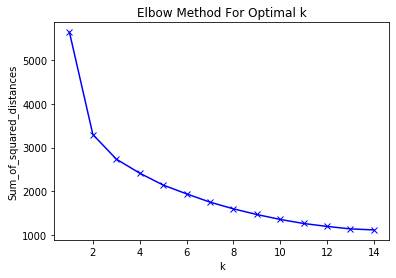

In [38]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [96]:
km2 =KMeans(init='k-means++', n_clusters=15, n_init=10).fit(data_transformed)




<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [135]:
true_labels =KMeans(init='k-means++', n_clusters=2, n_init=10).fit_predict(data_transformed)

In [136]:
len(true_labels)

8636

In [143]:
homogeneity_score_list = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    labels_pred = km.fit_predict(data_transformed)
    homogeneity_score = metrics.homogeneity_score(true_labels, labels_pred)
    homogeneity_score_list.append(homogeneity_score) 
homogeneity_score_list

[-1.207724116719704e-15,
 1.0,
 0.872765386679575,
 0.8108388704411547,
 0.8541264323630058,
 0.8024208133632028,
 0.8172263429981117,
 0.7958707183201272,
 0.7661148745961602]

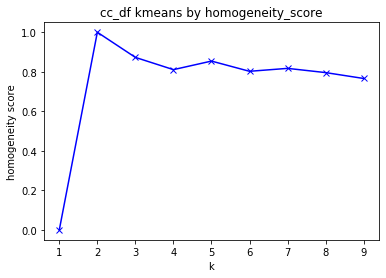

In [144]:
plt.plot(K, homogeneity_score_list, 'bx-')
plt.xlabel('k')
plt.ylabel('homogeneity score')
plt.title('cc_df kmeans by homogeneity_score')
plt.show()

In [149]:
completeness_score_list = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    labels_pred = km.fit_predict(data_transformed)
    completeness_score = metrics.completeness_score(true_labels, labels_pred)
    completeness_score_list.append(completeness_score) 
homogeneity_score_list

[-1.207724116719704e-15,
 1.0,
 0.872765386679575,
 0.8108388704411547,
 0.8541264323630058,
 0.8024208133632028,
 0.8172263429981117,
 0.7958707183201272,
 0.7661148745961602]

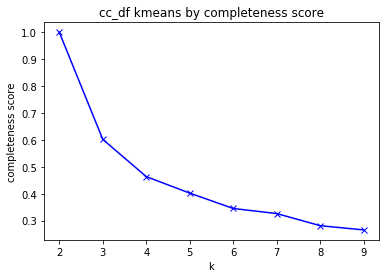

In [150]:
plt.plot(K, completeness_score_list, 'bx-')
plt.xlabel('k')
plt.ylabel('completeness score')
plt.title('cc_df kmeans by completeness score')
plt.show()

In [75]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(km2.labels_, labels))

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(km2.labels_, labels))
print("Completeness: %0.3f" % metrics.completeness_score(km2.labels_, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(km2.labels_, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(km2.labels_, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(km2.labels_, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data_transformed, labels, metric='sqeuclidean'))

12

In [160]:
#Calinski-Harabasz Index¶
calinski_harabasz_score_list = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    labels_pred = km.fit_predict(data_transformed)
    calinski_harabasz_score = metrics.calinski_harabasz_score(data_transformed, labels_pred)
    calinski_harabasz_score_list.append(calinski_harabasz_score) 
homogeneity_score_list

[-1.207724116719704e-15,
 1.0,
 0.872765386679575,
 0.8108388704411547,
 0.8541264323630058,
 0.8024208133632028,
 0.8172263429981117,
 0.7958707183201272,
 0.7661148745961602]

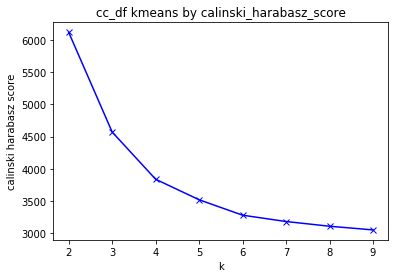

In [161]:
plt.plot(K, calinski_harabasz_score_list, 'bx-')
plt.xlabel('k')
plt.ylabel('calinski harabasz score')
plt.title('cc_df kmeans by calinski_harabasz_score')
plt.show()

In [162]:
#Davies-Bouldin Index
davies_bouldin_score_list = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    labels_pred = km.fit_predict(data_transformed)
    davies_bouldin_score_list = metrics.calinski_harabasz_score(data_transformed, labels_pred)
    davies_bouldin_score_list.append(davies_bouldin_score) 
davies_bouldin_score_list

[6116.22824007678,
 4570.050889070284,
 3836.274384381881,
 3519.580937406069,
 3280.6319494306995,
 3182.445066457918,
 3109.4929377718026,
 3052.360856537832]

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels[1:3001]]))

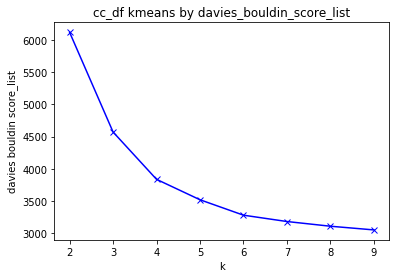

In [163]:
plt.plot(K, davies_bouldin_score_list, 'bx-')
plt.xlabel('k')
plt.ylabel('davies bouldin score_list')
plt.title('cc_df kmeans by davies_bouldin_score_list')
plt.show()